In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [61]:
data_path = '../../data/postprocessed/stress/'

mapping_table = {
    'gpuburn5min': 'GPU-burn',
    'NN50Perclenet5': 'LeNet5',
    'NN50Percmnasnet05': 'MnasNet',
    'NN50Percmobilenetv2': 'MobileNetV2',
    'NN50Percresnet18': 'ResNet18',
    'backprop': 'Back Propagation',
    'gaussian': 'Gaussian Elimination',
    'hotspot': 'Hotspot',
    'needle': 'Needleman-Wunsch',
    'scgpu': 'Stream Cluster'
}

data_sheet = pd.DataFrame()

files = [file for file in os.listdir(data_path) if not 'telemetry' in file]
print(files)
for csv_name in files:
    csv_full_path = os.path.join(data_path, csv_name)
    print(csv_full_path)
    df = pd.read_csv(csv_full_path)
    df['Range'] = int(csv_name.split('_')[1].split('.')[0])
    df['App_name'] = mapping_table[csv_name.split('_')[0]]
    df['progress'] = (df['session_id'] - df['session_id'].min()) / (df['session_id'].max() - df['session_id'].min()) * 100
    if csv_name.split('_')[0] == 'hotspot':
        df['Index'] = range(len(df))
        df['progress'] = (df['Index'] - df['Index'].min()) / (df['Index'].max() - df['Index'].min()) * 100
    # print(df[df.isna()])
    data_sheet=pd.concat([data_sheet, df], ignore_index=True)

location_mapping={
    'sm': 'Streaming Multiprocessor',
    'dram': 'Dynamic RAM',
    'l1tex': 'L1 Cache',
    'lts': 'L2 Cache',
    'smsp': 'Streaming Multiprocessor SubPartition'
}
data_sheet['HR_location'] = data_sheet['location'].map(location_mapping)

metric_event_mapping= {

    # Workload
    ## Compute
    'request_cycles_active': 'Number of cycles where the IDC processed requests from SM',
    'instruction_throughput': 'Instruction throughput',
    'inst_executed': 'Executed instructions',
    'inst_issued': 'Issued instructions',
    'sass_thread_inst_executed_op_fp64_pred_on': 'Instructions FP64',
    'sass_thread_inst_executed_op_integer_pred_on': 'Instructions Integers',

    ## Memory
    ### DRAM
    'bytes_read': 'Read Bytes',
    'bytes_write': 'Written bytes',

    ### L1 Cache
    't_sectors_pipe_lsu_mem_global_op_ld_lookup_hit': 'Global Memory Load Sectors – Cache Hit (per Thread Set via LSU)',
    't_sectors_pipe_lsu_mem_global_op_st_lookup_hit': 'Global Memory Store Sectors – Cache Hit (per Thread Set via LSU)',
    't_sectors_pipe_lsu_mem_global_op_red_lookup_hit': 'Global Memory Reduction – Cache Hit (per Thread Set via LSU)',
    't_sectors_pipe_lsu_mem_global_op_atom_lookup_hit': 'Global Memory Atomic – Cache Hit (per Thread Set via LSU)',
    't_sectors_pipe_lsu_mem_global_op_ld': ' Global Memory Load Sectors Served by L1 Cache (via LSU)',
    't_sectors_pipe_lsu_mem_global_op_st': ' Global Memory Store Sectors Served by L1 Cache (via LSU)',
    't_sectors_pipe_lsu_mem_global_op_red': 'Global Memory Reduction Sectors Served by L1 Cache (via LSU)',
    't_sectors_pipe_lsu_mem_global_op_atom': 'Global Memory Atomic Sectors Served by L1 Cache (via LSU)',
    
    ### L2 Cache
    't_sector_op_read_hit_rate': 'L2 hit rate by read instruction',
    't_sector_op_write_hit_rate': 'L2 hit rate by write instruction',

    # Stall
    ## Memory
    'warp_issue_stalled_imc_miss_per_warp_active': 'Warp Issue Stalls Due to IMC (Immediate Constant Cache) Misses per Active Warp ',
    'warp_issue_stalled_long_scoreboard_per_warp_active': 'Warp Issue Stalls Due to Long Scoreboard (Long Wait for Resource) per Active Warp',

    ## Controller
    'warp_issue_stalled_short_scoreboard_per_warp_active': 'Warp Issue Stalls Due to Short Scoreboard (Resource Wait) per Active Warp',
    'warp_issue_stalled_wait_per_warp_active': 'Warp Issue Stalls Due to Wait (Resource/Data Not Ready) per Active Warp',
    'warp_issue_stalled_not_selected_per_warp_active': 'Warp Issue Stalls Due to Not Being Selected per Active Warp',
    'warp_issue_stalled_sleeping_per_warp_active': 'Warp Issue Stalls Due to Sleeping per Active Warp',
    'warp_issue_stalled_membar_per_warp_active': 'Warp Issue Stalls Due to Membar per Active Warp',
    'warp_issue_stalled_barrier_per_warp_active': 'Warp Issue Stalls Due to Barrier per Active Warp',
    'warp_issue_stalled_dispatch_stall_per_warp_active': 'Warp Issue Stalls Due to Dispatch Stall per Active Warp',

    ## Throttle
    'warp_issue_stalled_drain_per_warp_active': 'Warp Issue Stalls Due to Drain (Memory/Resource Write Completion) per Active Warp',
    'warp_issue_stalled_lg_throttle_per_warp_active': 'Warp Issue Stalls Due to Large Unit Throttling (Resource Limitation) per Active Warp',
    'warp_issue_stalled_math_pipe_throttle_per_warp_active': 'Warp Issue Stalls Due to Math Pipe Throttling per Active Warp',
    'warp_issue_stalled_mio_throttle_per_warp_active': 'Warp Issue Stalls Due to MIO Throttling per Active Warp',
    'warp_issue_stalled_tex_throttle_per_warp_active': 'Warp Issue Stalls Due to Texture Throttling per Active Warp',

    ## Others
    'warp_issue_stalled_misc_per_warp_active': 'Warp Issue Stalls Due to Miscellaneous Issues per Active Warp',

}
data_sheet['metric_name'].unique()

data_sheet['HR_metric_name'] = data_sheet['metric_name'].map(metric_event_mapping)

# data_sheet=data_sheet[data_sheet['progress']>30]

df_l2 = data_sheet[data_sheet['HR_location']=='L2 Cache']
df_sm = data_sheet[data_sheet['HR_location']=='Streaming Multiprocessor']
df_smsp = data_sheet[data_sheet['HR_location']=='Streaming Multiprocessor SubPartition']
df_l1 = data_sheet[data_sheet['HR_location']=='L1 Cache']
df_dram = data_sheet[data_sheet['HR_location']=='Dynamic RAM']

dfs = {
    'L2 Cache': df_l2, 
    'Streaming Multiprocessor': df_sm, 
    'Streaming Multiprocessor SubPartition': df_smsp, 
    'L1 Cache': df_l1, 
    'Dynamic RAM': df_dram
    }

df_pivot_l2 = df_l2.pivot_table(
    index=["progress", "HR_location", "range_name", "Range", "App_name", 'rollup_operation', 'Post'],
    columns="HR_metric_name",
    values="metric_value"
).reset_index()

df_pivot_sm = df_sm.pivot_table(
    index=["progress", "HR_location", "range_name", "Range", "App_name", 'rollup_operation', 'Post'],
    columns="HR_metric_name",
    values="metric_value"
).reset_index()

df_pivot_smsp = df_smsp.pivot_table(
    index=["progress", "HR_location", "range_name", "Range", "App_name", 'rollup_operation', 'Post'],
    columns="HR_metric_name",
    values="metric_value"
).reset_index()

df_pivot_smsp['Memory Stall']=(df_pivot_smsp['Warp Issue Stalls Due to IMC (Immediate Constant Cache) Misses per Active Warp '] +\
              df_pivot_smsp['Warp Issue Stalls Due to Long Scoreboard (Long Wait for Resource) per Active Warp']) /2

df_pivot_smsp['Controller Stall']=(df_pivot_smsp['Warp Issue Stalls Due to Not Being Selected per Active Warp'] +\
                df_pivot_smsp['Warp Issue Stalls Due to Short Scoreboard (Resource Wait) per Active Warp'] +\
                df_pivot_smsp['Warp Issue Stalls Due to Wait (Resource/Data Not Ready) per Active Warp'] +\
                df_pivot_smsp['Warp Issue Stalls Due to Sleeping per Active Warp'] +\
                df_pivot_smsp['Warp Issue Stalls Due to Membar per Active Warp'] +\
                df_pivot_smsp['Warp Issue Stalls Due to Barrier per Active Warp'] ) /7

df_pivot_smsp['Throttle Stall']=(df_pivot_smsp['Warp Issue Stalls Due to Drain (Memory/Resource Write Completion) per Active Warp'] +\
                                df_pivot_smsp['Warp Issue Stalls Due to Large Unit Throttling (Resource Limitation) per Active Warp'] +\
                                df_pivot_smsp['Warp Issue Stalls Due to Math Pipe Throttling per Active Warp'] +\
                                df_pivot_smsp['Warp Issue Stalls Due to MIO Throttling per Active Warp'] +\
                                df_pivot_smsp['Warp Issue Stalls Due to Texture Throttling per Active Warp']) /5

df_pivot_l1 = df_l1.pivot_table(
    index=["progress", "HR_location", "range_name", "Range", "App_name", 'rollup_operation', 'Post'],
    columns="HR_metric_name",
    values="metric_value"
).reset_index()

df_pivot_l1['Global hit rate'] = (df_pivot_l1['Global Memory Atomic – Cache Hit (per Thread Set via LSU)']+ \
                                df_pivot_l1['Global Memory Load Sectors – Cache Hit (per Thread Set via LSU)']+\
                                df_pivot_l1['Global Memory Reduction – Cache Hit (per Thread Set via LSU)']+\
                                df_pivot_l1['Global Memory Store Sectors – Cache Hit (per Thread Set via LSU)']) / \
                                (df_pivot_l1[' Global Memory Load Sectors Served by L1 Cache (via LSU)']+ \
                                df_pivot_l1[' Global Memory Store Sectors Served by L1 Cache (via LSU)']+\
                                df_pivot_l1['Global Memory Atomic Sectors Served by L1 Cache (via LSU)']+\
                                df_pivot_l1['Global Memory Reduction Sectors Served by L1 Cache (via LSU)'])

df_pivot_dram = df_dram.pivot_table(
    index=["progress", "HR_location", "range_name", "Range", "App_name", 'rollup_operation', 'Post'],
    columns="HR_metric_name",
    values="metric_value"
).reset_index()

pivot_dfs = {
    'L2 Cache': df_pivot_l2, 
    'Streaming Multiprocessor': df_pivot_sm, 
    'Streaming Multiprocessor SubPartition': df_pivot_smsp, 
    'L1 Cache': df_pivot_l1, 
    'Dynamic RAM': df_pivot_dram
    }

a = pivot_dfs['L1 Cache'].groupby(by=["App_name"])[['Global hit rate']]\
    .quantile(0.75)\
        .reset_index()
b = pivot_dfs['L2 Cache'].groupby(by=["App_name"])[[ 'L2 hit rate by read instruction','L2 hit rate by write instruction']]\
    .quantile(0.75)\
        .reset_index()

c = pivot_dfs['Streaming Multiprocessor'].groupby(by=["App_name"])[[ 'Executed instructions','Instruction throughput', 'Issued instructions']]\
    .quantile(0.75)\
        .reset_index()

d = pivot_dfs['Dynamic RAM'].groupby(by=["App_name"])[[ 'Read Bytes', 'Written bytes']]\
    .quantile(0.75)\
        .reset_index()

e = pivot_dfs['Streaming Multiprocessor SubPartition'].groupby(by=["App_name"])[['Memory Stall', 'Controller Stall', 'Throttle Stall']]\
    .quantile(0.75)\
        .reset_index()

merge_1 = pd.merge(a, b[['App_name', 'L2 hit rate by read instruction','L2 hit rate by write instruction']], on='App_name')
merge_2 = pd.merge(merge_1, c[['App_name', 'Executed instructions','Instruction throughput', 'Issued instructions']], on='App_name')
merge_3 = pd.merge(merge_2, d[['App_name','Read Bytes', 'Written bytes']], on='App_name')
final_merge = pd.merge(merge_3, e[['App_name', 'Memory Stall', 'Controller Stall', 'Throttle Stall']], on='App_name')

['hotspot_1.csv', 'backprop_1.csv', 'gpuburn5min_1.csv', 'NN50Percresnet18_1.csv', 'gaussian_1.csv', 'NN50Perclenet5_1.csv', 'needle_1.csv', 'scgpu_1.csv', 'NN50Percmnasnet05_1.csv', 'NN50Percmobilenetv2_1.csv']
../../data/postprocessed/stress/hotspot_1.csv
../../data/postprocessed/stress/backprop_1.csv
../../data/postprocessed/stress/gpuburn5min_1.csv
../../data/postprocessed/stress/NN50Percresnet18_1.csv
../../data/postprocessed/stress/gaussian_1.csv
../../data/postprocessed/stress/NN50Perclenet5_1.csv
../../data/postprocessed/stress/needle_1.csv
../../data/postprocessed/stress/scgpu_1.csv
../../data/postprocessed/stress/NN50Percmnasnet05_1.csv
../../data/postprocessed/stress/NN50Percmobilenetv2_1.csv


In [62]:
df_l2[df_l2['App_name']=='Hotspot']['HR_metric_name'].unique()

array(['L2 hit rate by read instruction',
       'L2 hit rate by write instruction'], dtype=object)

## Cumulative analysis

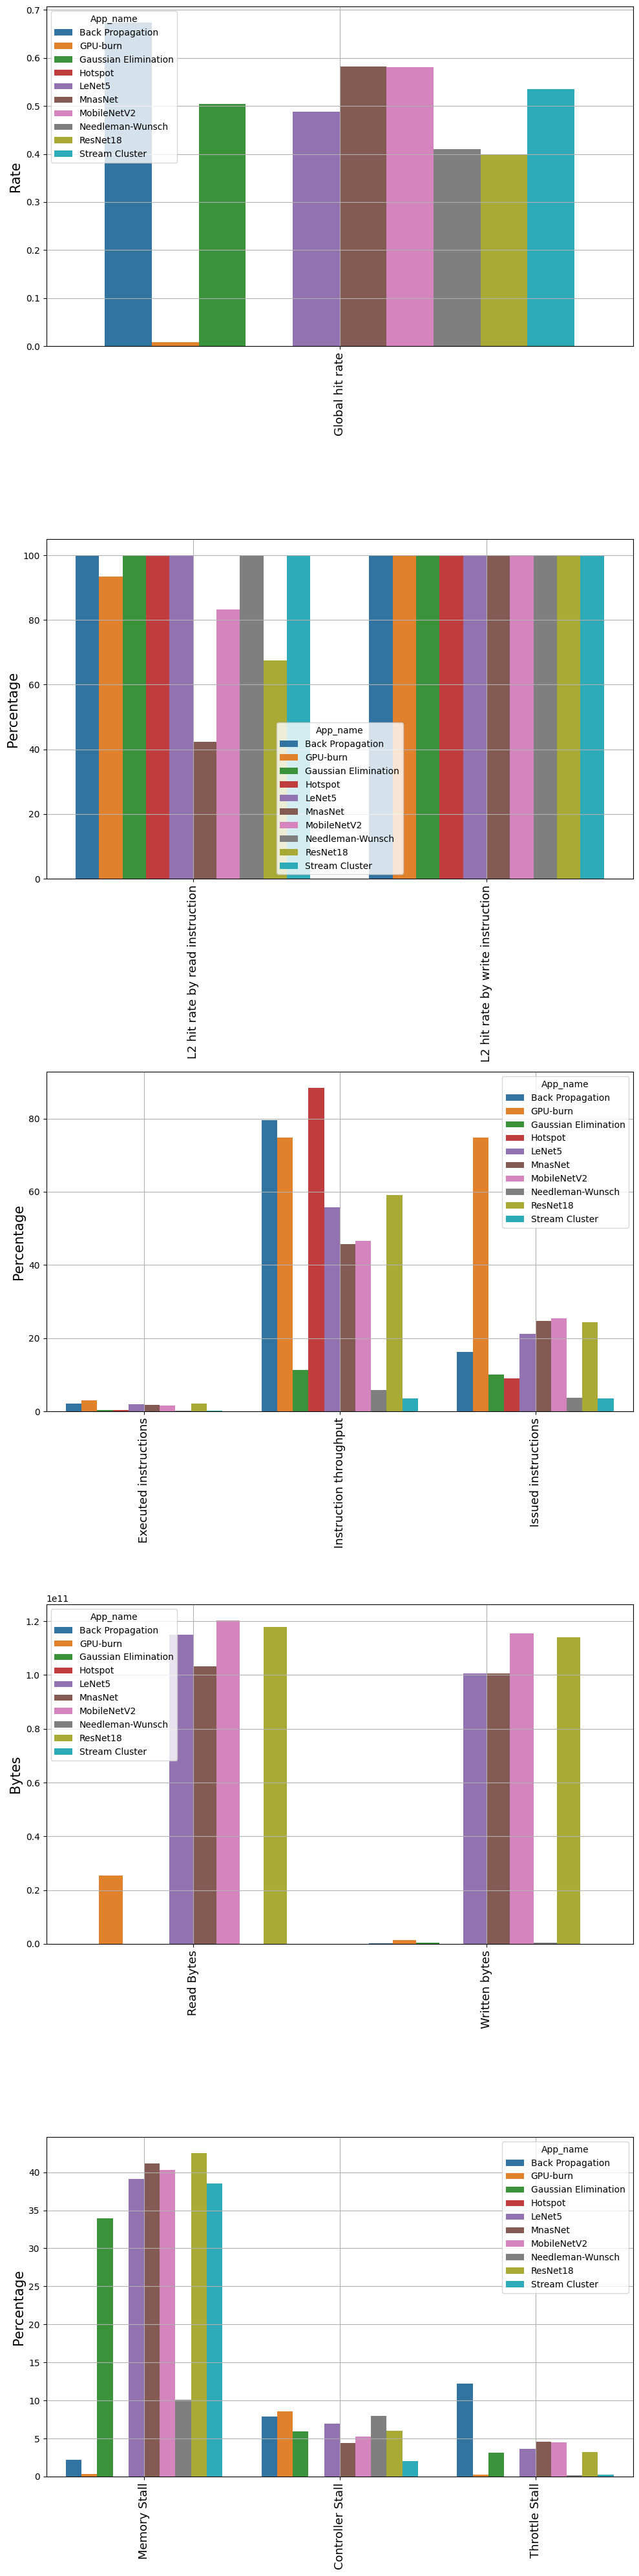

In [63]:
a_merge = pd.melt(
    a,
    id_vars='App_name',
    var_name='Metric',
    value_name='Value'
)

b_merge = pd.melt(
    b,
    id_vars='App_name',
    var_name='Metric',
    value_name='Value'
)

c_merge = pd.melt(
    c,
    id_vars='App_name',
    var_name='Metric',
    value_name='Value'
)

d_merge = pd.melt(
    d,
    id_vars='App_name',
    var_name='Metric',
    value_name='Value'
)

e_merge = pd.melt(
    e,
    id_vars='App_name',
    var_name='Metric',
    value_name='Value'
)

fig, ax = plt.subplots(5,1, figsize=(10,40))

# plt.yscale('log')
sns.barplot(data=a_merge, x='Metric', y='Value', hue='App_name', ax = ax[0])
ax[0].grid()
# ax[0].set_yscale('log')
ax[0].set_xlabel('Metric', fontsize=15)
ax[0].set_ylabel('Rate', fontsize=15)
ax[0].tick_params(axis='x', labelrotation=90, labelsize=13)
# ax[0].set_xticklabels([])
ax[0].set_xlabel('')

sns.barplot(data=b_merge, x='Metric', y='Value', hue='App_name', ax = ax[1])
ax[1].grid()
# ax[1].set_yscale('log')
ax[1].set_xlabel('Metric', fontsize=15)
ax[1].set_ylabel('Percentage', fontsize=15)
ax[1].tick_params(axis='x', labelrotation=90, labelsize=13)
# ax[1].set_xticklabels([])
ax[1].set_xlabel('')

sns.barplot(data=c_merge, x='Metric', y='Value', hue='App_name', ax = ax[2])
ax[2].grid()
# ax[2].set_yscale('log')
ax[2].set_xlabel('Metric', fontsize=15)
ax[2].set_ylabel('Percentage', fontsize=15)
ax[2].tick_params(axis='x', labelrotation=90, labelsize=13)
# ax[2].set_xticklabels([])
ax[2].set_xlabel('')

sns.barplot(data=d_merge, x='Metric', y='Value', hue='App_name', ax = ax[3])
ax[3].grid()
# ax[3].set_yscale('log')
ax[3].set_xlabel('Metric', fontsize=15)
ax[3].set_ylabel('Bytes', fontsize=15)
ax[3].tick_params(axis='x', labelrotation=90, labelsize=13)
# ax[3].set_xticklabels([])
ax[3].set_xlabel('')

sns.barplot(data=e_merge, x='Metric', y='Value', hue='App_name', ax = ax[4])
ax[4].grid()
# ax[4].set_yscale('log')
ax[4].set_xlabel('Metric', fontsize=15)
ax[4].set_ylabel('Percentage', fontsize=15)
ax[4].tick_params(axis='x', labelrotation=90, labelsize=13)
# ax[4].set_xticklabels([])
ax[4].set_xlabel('')

plt.tight_layout()

In [25]:
mapping_table = {
    'gpuburn5min': 'GPU-burn',
    'NN50Perclenet5': 'LeNet5',
    'NN50Percmnasnet05': 'MnasNet',
    'NN50Percmobilenetv2': 'MobileNetV2',
    'NN50Percresnet18': 'ResNet18',
    'backprop': 'Back Propagation',
    'gaussian': 'Gaussian Elimination',
    'hotspot': 'Hotspot',
    'needle': 'Needleman-Wunsch',
    'scgpu': 'Stream Cluster'
}
data_path = '../../data/postprocessed/stress/'
telemetry = pd.DataFrame()
for csv_name in [file for file in os.listdir(data_path) if (file.endswith('_telemetry.csv'))]:
    csv_full_path = os.path.join(data_path, csv_name)
    print(csv_full_path)
    df = pd.read_csv(csv_full_path)
    df['Index'] = range(len(df))
    print(len(df))
    df['progress'] = df['Index'].transform(
        lambda x: 100 * (x - x.min()) / (x.max() - x.min()) if x.max() > x.min() else 0)
    df['Range'] = int(csv_name.split('_')[1].split('_')[0])
    df['App_name'] = mapping_table[csv_name.split('_')[0]]
    print(csv_name.split('_')[0])

    telemetry=pd.concat([telemetry, df], ignore_index=True)

../../data/postprocessed/stress/NN50Perclenet5_1_telemetry.csv
352
NN50Perclenet5
../../data/postprocessed/stress/NN50Percmobilenetv2_1_telemetry.csv
361
NN50Percmobilenetv2
../../data/postprocessed/stress/NN50Percresnet18_1_telemetry.csv
363
NN50Percresnet18
../../data/postprocessed/stress/gpuburn5min_1_telemetry.csv
330
gpuburn5min
../../data/postprocessed/stress/gaussian_1_telemetry.csv
299
gaussian
../../data/postprocessed/stress/NN50Percmnasnet05_1_telemetry.csv
404
NN50Percmnasnet05
../../data/postprocessed/stress/scgpu_1_telemetry.csv
299
scgpu
../../data/postprocessed/stress/backprop_1_telemetry.csv
299
backprop
../../data/postprocessed/stress/needle_1_telemetry.csv
299
needle
../../data/postprocessed/stress/hotspot_1_telemetry.csv
298
hotspot


In [26]:
telemetry['Index'].describe()

count    3304.000000
mean      166.648608
std        98.851459
min         0.000000
25%        82.000000
50%       165.000000
75%       247.000000
max       403.000000
Name: Index, dtype: float64

In [27]:
telemetry[telemetry['App_name']=='Back propagation']

,timestamp_ns,gpu_index,name,temperature_C,util_gpu_percent,util_mem_percent,mem_total_MB,mem_used_MB,mem_free_MB,clock_sm_MHz,...,ecc_volatile_uncorrected,ecc_aggregate_corrected,ecc_aggregate_uncorrected,total_energy_mJ,clock_freq,adaptive_clock_frequency,Index,progress,Range,App_name


Application name: GPU-burn
[43 43 48 49 50 50 48 51 52 52 52 50 52 52 53 53 52 52 52 54 51 54 54 54
 55 53 55 55 56 56 56 55 55 56 54 56 56 57 57 55 56 57 57 57 57 57 57 57
 55 58 58 58 58 58 58 58 59 59 59 60 59 59 59 57 59 59 59 59 59 59 59 60
 60 64 60 60 60 58 60 60 60 60 61 60 60 61 61 61 61 61 61 59 61 61 61 61
 60 61 61 62 62 63 62 61 62 63 62 62 62 62 60 62 61 62 63 63 63 62 63 65
 63 63 63 63 61 63 63 63 63 61 63 63 63 63 62 63 63 63 64 64 63 63 63 61
 63 64 64 64 62 64 64 64 64 62 64 64 64 62 64 64 64 64 63 64 64 65 65 65
 65 65 65 62 65 65 65 65 65 65 65 65 65 65 65 65 65 63 65 65 65 65 65 63
 65 65 65 65 65 65 65 65 68 65 65 66 66 64 65 66 66 66 66 66 65 66 67 66
 66 66 66 70 66 66 66 65 66 66 66 66 66 66 66 66 66 69 66 66 66 66 66 66
 66 66 69 66 66 67 67 65 66 67 67 67 64 66 67 67 67 67 67 67 67 67 67 67
 67 67 65 67 67 67 67 67 67 67 67 67 67 67 67 67 66 67 67 67 67 67 67 67
 67 67 69 67 67 68 68 67 67 67 67 71 68 67 68 68 66 68 68 68 68 66 63 62
 61 61 61 60 60 60 59 59

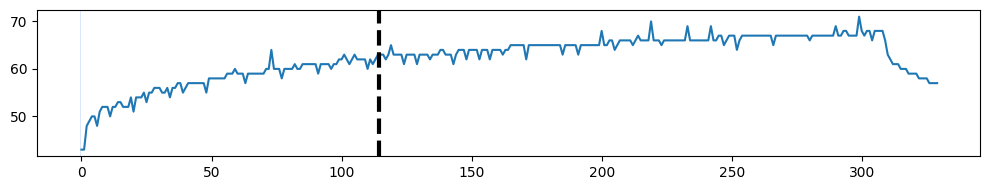

Application name: LeNet5
[44 44 44 45 46 47 49 48 48 50 51 50 49 49 51 51 51 50 50 52 51 51 51 50
 52 52 52 51 51 52 52 52 51 51 53 52 53 52 52 53 53 53 53 53 54 54 54 53
 53 54 54 55 54 53 54 56 55 54 54 55 56 55 55 54 55 56 55 54 54 55 57 55
 55 55 55 57 55 55 55 55 57 56 55 55 55 57 55 55 55 56 56 56 55 56 56 56
 56 56 56 57 57 56 56 56 57 57 56 56 57 58 57 57 56 58 58 58 57 56 58 58
 57 57 56 58 59 57 57 57 58 59 57 57 57 59 58 58 57 57 59 58 58 57 57 59
 58 58 58 57 60 59 58 58 57 59 59 58 58 57 58 58 58 58 57 58 58 58 58 58
 60 59 59 58 58 58 60 59 58 58 59 60 59 58 58 59 60 60 58 58 59 60 59 58
 58 59 60 59 58 58 60 61 59 59 58 59 61 59 59 58 59 61 59 59 58 59 61 59
 59 58 60 61 59 59 59 59 61 59 59 59 59 61 60 59 59 59 61 60 59 59 60 61
 60 59 59 60 61 60 59 59 60 61 60 60 59 60 61 60 59 59 60 61 60 59 59 61
 62 60 60 59 60 62 60 60 59 60 62 60 60 59 60 62 60 60 59 61 62 60 60 60
 60 62 60 60 60 60 61 60 60 59 61 61 60 60 60 60 61 60 60 60 61 61 60 60
 60 61 61 60 60 61 61 61 6

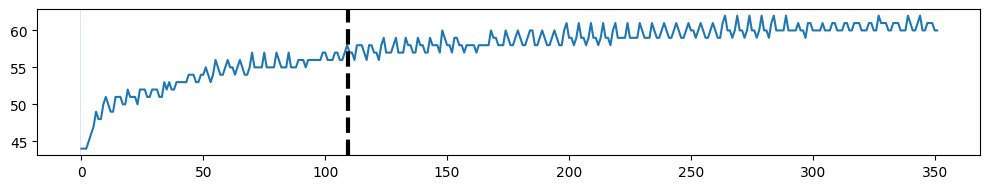

Application name: MnasNet
[44 44 45 45 45 47 48 51 50 49 49 52 49 50 51 52 52 51 51 52 52 52 52 52
 52 52 53 52 52 53 53 53 54 53 55 54 53 54 55 55 54 54 55 55 56 55 56 56
 56 54 55 57 56 54 56 57 56 55 55 57 56 55 56 56 56 57 57 56 56 56 57 57
 58 58 57 57 57 57 57 57 59 58 58 57 59 59 59 58 58 58 57 60 58 58 58 58
 59 58 59 58 60 59 59 59 60 59 58 59 59 60 58 59 58 60 60 60 59 60 61 59
 60 60 61 60 60 60 61 59 60 60 62 60 62 60 59 59 59 62 60 62 60 60 60 62
 60 60 60 61 60 60 61 63 60 60 62 62 61 61 61 61 61 63 61 61 61 61 61 61
 63 61 61 62 62 61 63 62 61 61 61 61 63 63 61 61 62 62 61 62 62 62 61 62
 62 62 62 61 62 63 62 62 62 61 61 60 62 62 62 63 62 62 63 62 62 63 63 63
 62 62 64 63 63 62 63 62 62 63 62 63 64 62 63 62 63 63 63 64 62 63 64 63
 63 64 63 63 64 64 64 62 63 63 64 63 65 63 64 64 65 63 65 63 65 63 64 64
 65 63 64 63 63 62 61 64 63 66 63 64 64 65 63 63 63 64 63 63 63 66 64 64
 64 66 63 63 66 64 64 64 64 63 63 64 63 64 66 65 64 65 64 63 63 65 64 64
 64 64 65 64 64 64 64 64 

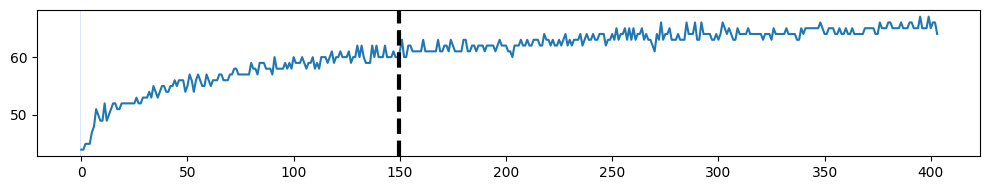

Application name: MobileNetV2
[43 43 44 44 47 48 48 48 49 48 49 49 49 49 49 50 50 50 50 50 51 50 51 51
 51 52 51 53 51 52 52 52 53 52 53 53 52 53 53 53 53 53 54 54 54 54 53 54
 55 55 55 55 54 55 55 55 55 55 56 55 55 55 55 55 55 55 56 56 56 56 55 56
 56 56 56 56 56 58 56 56 57 56 56 57 57 57 57 57 56 58 57 57 57 58 57 58
 58 57 59 58 58 57 57 58 57 58 58 58 58 58 58 59 58 58 58 58 59 58 59 58
 58 58 59 58 59 59 58 59 58 59 60 58 59 59 60 59 59 60 59 59 59 60 60 61
 61 59 60 60 60 59 61 59 60 59 60 60 59 60 60 59 60 60 60 61 61 60 60 60
 60 60 60 60 61 60 60 60 61 61 60 60 60 61 61 62 61 61 61 61 61 61 62 60
 63 60 61 61 61 61 61 61 61 61 62 61 61 61 61 61 61 62 61 61 61 61 61 61
 62 61 61 61 62 61 61 62 61 61 62 62 61 61 62 61 62 62 62 62 62 63 61 62
 62 62 62 63 62 61 62 62 62 61 62 62 62 62 62 62 62 62 62 62 62 62 62 62
 64 62 62 63 62 62 62 63 62 63 63 63 62 63 63 63 64 62 64 62 62 63 62 62
 63 62 63 63 62 63 62 62 64 63 63 63 62 63 63 63 64 64 63 63 62 64 63 63
 63 63 63 63 62 63 63

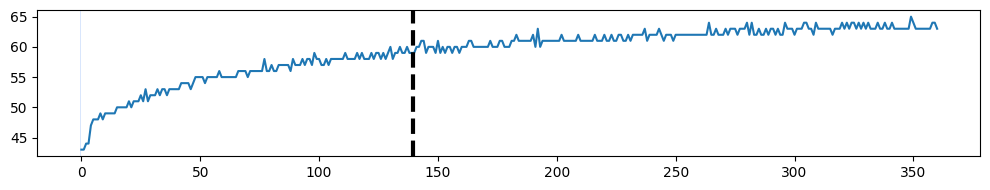

Application name: ResNet18
[44 44 45 45 48 50 50 50 50 50 50 50 50 50 51 51 52 51 52 52 52 51 51 52
 52 52 52 52 53 53 52 53 54 53 53 55 54 56 54 55 54 55 54 55 55 55 55 55
 55 55 55 55 55 54 55 56 55 55 56 56 55 56 55 55 56 56 56 56 56 57 57 56
 58 57 57 57 58 56 57 57 56 57 56 56 57 58 57 57 57 57 57 58 57 57 57 57
 57 57 57 57 57 58 58 57 57 57 58 58 59 61 58 59 58 59 58 59 59 59 59 59
 59 60 59 60 60 59 59 58 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 62 60 62 61 61 60 61 60 62 60 60 61 61 60 60 61 62 60 61 60 60 61 61 60
 61 60 61 61 60 61 60 60 60 61 61 61 61 63 61 61 61 60 60 62 61 61 60 61
 61 61 60 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61 61
 64 62 64 63 63 62 62 62 62 62 62 61 62 62 62 62 62 62 62 62 61 62 62 62
 63 62 62 62 62 63 62 61 62 62 63 62 62 63 63 63 65 64 63 64 63 63 63 63
 63 62 62 64 63 63 63 63 63 63 63 63 63 62 62 63 63 64 62 63 63 62 64 63
 63 62 62 64 63 63 63 64 62 63 63 63 63 63 63 63 64 63 62 64 63 63 63 62
 63 63 63 62 63 63 63 63

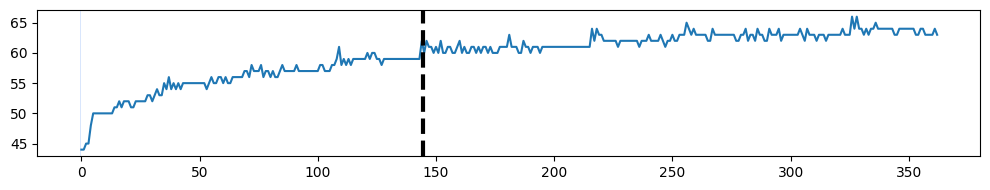

Application name: Back Propagation
[46 48 48 49 49 49 49 49 49 50 50 49 50 50 50 50 50 50 50 50 50 51 51 51
 51 51 51 51 51 51 52 52 52 51 51 52 51 52 52 52 52 52 52 52 52 52 52 52
 52 52 52 52 52 52 52 52 52 52 53 53 53 53 53 53 53 53 53 53 53 53 52 53
 53 53 53 53 53 53 53 53 53 53 53 53 53 53 54 54 54 54 54 54 54 53 53 54
 54 54 53 54 53 53 54 53 53 53 54 53 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 55 54 54 54 54 54 55 55 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 55 54 54 55 55 55 54 54 54 54 54 54 54 54 54 54 55 54 54 55 55 55 55
 55 55 55 55 55 55 55 54 54 54 55 55 54 55 55 54 55 55 54 55 55 55 55 55
 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55
 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 56 56
 55 55 55 55 55 55 55 55 55 55 55]
[299]


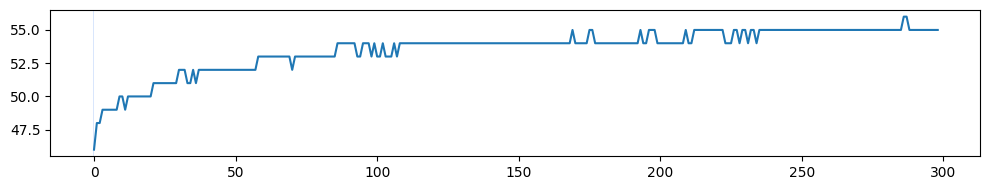

Application name: Gaussian Elimination
[43 45 45 45 46 46 46 46 46 47 47 47 47 47 47 47 47 48 48 48 48 48 48 48
 48 48 48 48 49 49 49 49 49 49 49 49 49 49 49 49 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 51 50 51 50 51 51 51 51 51 51 51 51 51 51 51 51 51
 51 51 51 51 51 52 51 51 52 52 52 51 52 52 52 52 52 52 52 52 52 52 52 52
 52 52 52 52 52 52 52 53 52 53 52 53 53 53 53 53 53 53 53 53 53 53 53 53
 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 54 54 53 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 55 54 54 55
 54 54 55 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 55
 54 55 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 55 54 54 54 54 55 55 55 55 54 55 54 55 54 55 54 55 55 55 55
 55 55 54 55 54 55 54 55 54 55 54]
[105, 299]


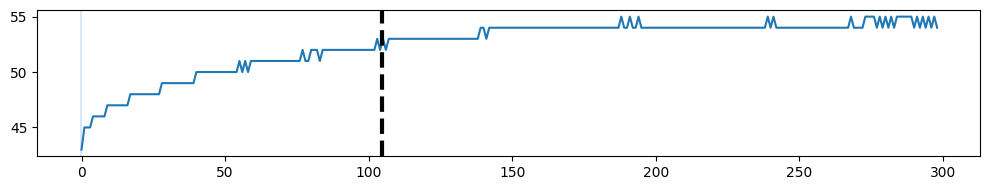

Application name: Hotspot
[44 46 47 47 47 47 47 47 47 47 47 48 48 48 49 51 50 50 50 50 50 50 49 49
 49 49 49 49 49 50 50 50 51 52 51 51 51 51 51 51 51 51 51 51 51 51 51 51
 52 52 54 53 53 53 53 53 52 52 52 52 52 52 52 52 52 52 52 53 53 55 53 53
 53 53 53 53 53 52 52 52 52 52 52 52 52 53 53 53 53 54 55 54 54 54 54 54
 54 53 53 53 53 53 53 53 53 54 53 53 54 55 55 55 54 54 54 54 54 54 53 53
 53 53 53 54 54 54 54 54 56 55 55 55 55 55 55 54 55 54 54 54 54 54 54 54
 54 54 54 54 55 55 56 56 55 55 55 55 55 55 54 54 54 54 54 54 54 54 54 55
 55 55 55 57 56 55 55 55 55 55 55 55 55 54 54 54 54 55 55 55 55 55 55 55
 55 56 57 56 56 56 56 56 56 55 55 55 55 55 55 55 55 55 55 56 56 57 57 56
 56 56 56 56 56 55 55 55 55 55 55 55 55 55 56 56 58 57 56 56 56 56 56 55
 55 55 55 55 55 55 55 55 56 56 56 56 57 58 57 57 56 56 56 56 56 56 55 55
 55 55 55 56 56 56 56 56 57 58 57 57 57 57 57 57 56 56 56 56 55 56 56 56
 56 56 57 57 58 57 57 57 57 57]
[125, 298]


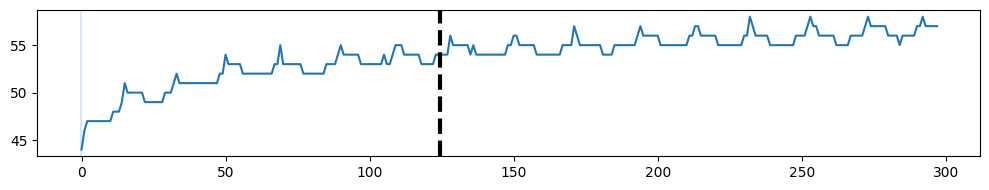

Application name: Needleman-Wunsch
[43 45 45 46 46 46 46 46 46 46 47 47 47 47 47 47 47 48 47 48 48 48 48 48
 48 48 48 48 48 49 49 49 49 49 49 49 49 49 49 49 49 49 50 49 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 51 50 51 51 51 51 51 51 51 51 51 51 51 51
 51 51 51 51 51 52 52 51 52 52 52 52 52 52 51 52 52 52 52 52 52 52 52 52
 52 52 52 52 52 52 52 52 52 52 53 52 53 53 53 53 53 53 53 53 53 53 53 53
 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53
 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53
 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53
 53 53 53 53 53 53 53 53 53 53 53 53 54 54 53 54 53 53 54 54 54 54 54 54
 54 53 54 54 54 54 54 54 53 54 54 54 54 54 54 54 54 54 54 53 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 53 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54]
[105, 210, 299]


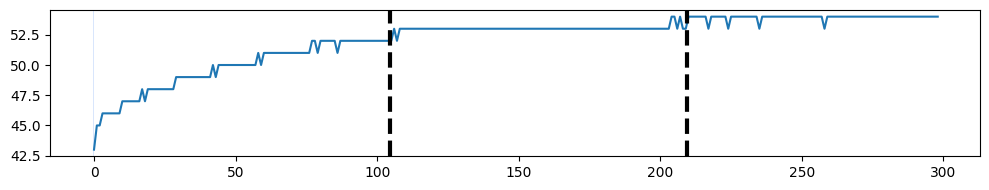

Application name: Stream Cluster
[43 45 45 46 46 46 46 46 47 47 47 47 47 47 47 47 48 48 48 48 48 48 48 48
 48 48 49 49 49 49 49 49 49 49 49 49 49 49 49 49 50 49 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 51 51 51 51 51 51 51 51 51 51 51 51 51 51
 51 51 51 51 51 51 51 51 51 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52
 52 52 52 52 52 52 52 52 52 52 52 52 53 53 53 53 53 53 53 53 53 53 53 53
 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53 53
 53 53 53 54 53 54 53 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54]
[110, 299]


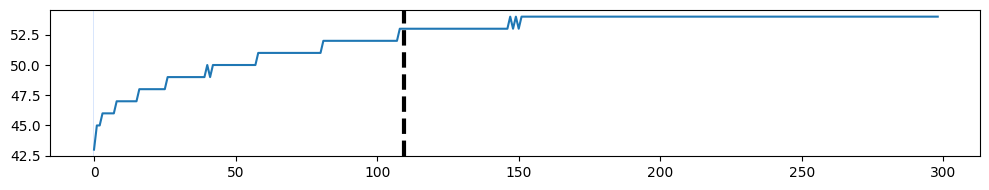

,App_name,Response time (s)
0,GPU-burn,115
1,LeNet5,110
2,MnasNet,150
3,MobileNetV2,140
4,ResNet18,145
5,Back Propagation,115
6,Gaussian Elimination,105
7,Hotspot,125
8,Needleman-Wunsch,105
9,Stream Cluster,110


In [35]:
import matplotlib.pyplot as plt
import ruptures as rpt
from scipy.stats import linregress
response_time={
    'App_name':[],
    'Response time (s)':[]
}
for label in list(mapping_table.values()):
    print(f'Application name: {label}')
    signal = np.array(telemetry[telemetry['App_name']==label]['temperature_C'])
    algo = rpt.Pelt(model="rbf").fit(signal)
    # print(algo)
    bkps =[0]
    print(signal)
    result = algo.predict(pen=51)
    transient = telemetry[telemetry['App_name']==label]['temperature_C'].iloc[:result[0]]
    slope, intercept, r_value, p_value, std_err = linregress(transient.index.values, transient.values)
    print(result)
    rpt.display(signal, bkps, result)
    plt.show()
    response_time['App_name'].append(label)
    response_time['Response time (s)'].append(result[0])
    
response_time=pd.DataFrame(response_time)
response_time.loc[response_time['App_name']=='Back Propagation','Response time (s)'] = 115
response_time

# print(f"Pendenza del transiente: {slope:.4f}")
# print(f"Correlazione tra le variabili: {r_value:.4f}")
# print(f"p_value della regressione: {p_value:.4f}")
# print(f"std_err della stima: {std_err:.4f}")

# plt.plot(transient.index.values, transient.values, label="Serie temporale")
# plt.plot(transient.index.values, slope * transient.index.values + intercept, 'r--', label=f"Fit transiente (slope={slope:.2f})")
# plt.legend()
# plt.xlabel("Tempo")
# plt.ylabel("Valore")
# plt.title("Pendenza del transiente")
# plt.grid(True)
# plt.show()

In [36]:
duration = telemetry.groupby('App_name')['Index'].max()
telemetry.groupby('App_name')['power_draw_W'].mean()
telemetry.groupby('App_name')['power_draw_W'].mean()*duration

App_name
Back Propagation         4511.005398
GPU-burn                10694.237718
Gaussian Elimination     4826.012328
Hotspot                  5002.946064
LeNet5                   8665.206801
MnasNet                 12578.203577
MobileNetV2             10925.145374
Needleman-Wunsch         4819.170288
ResNet18                11220.710562
Stream Cluster           4802.760355
dtype: float64

In [64]:
columns_mapping = {'Global hit rate': 'L1 hit rate', 
                   'L2 hit rate by read instruction': 'L2 hit rate', 
                   'Executed instructions': 'Executed instructions (%)', 
                   'Instruction throughput': 'Instruction throughput (%)', 
                   'Issued instructions': 'Issued instructions (%)', 
                   'Memory Stall': 'Memory Stall (%)', 
                   'Controller Stall': 'Controller Stall (%)', 
                   'Throttle Stall':'Throttle Stall (%)'}

final_merge.rename(columns=columns_mapping, inplace=True)

# telemetry

new_telemetry = telemetry[telemetry['Index']>125].groupby('App_name')[['temperature_C']].mean().reset_index()

telemetry['total_energy_J'] = telemetry['total_energy_mJ']/1000
spent_energy = telemetry.groupby('App_name')[['total_energy_J']].max() - telemetry.groupby('App_name')[['total_energy_J']].min()
spent_energy['mean_energy_J'] = spent_energy['total_energy_J']/(duration/60)
cf = telemetry.groupby('App_name')['clock_sm_MHz'].mean().reset_index()
spent_energy = spent_energy.reset_index()
print(cf)

# slope_data = (0.635*(telemetry.groupby('App_name')[['temperature_C']].quantile(0.95) - telemetry.groupby('App_name')[['temperature_C']].min()))+telemetry.groupby('App_name')[['temperature_C']].min()
# slope_data = slope_data.reset_index()
# slope_data.rename(columns={'temperature_C': 'Response time (s)'}, inplace=True)

new_telemetry = pd.merge(new_telemetry[['temperature_C', 'App_name']], response_time, on='App_name')
new_telemetry = pd.merge(new_telemetry[['temperature_C', 'App_name', 'Response time (s)']], spent_energy[['App_name', 'mean_energy_J']], on='App_name')
new_telemetry = pd.merge(new_telemetry[['temperature_C', 'App_name', 'Response time (s)', 'mean_energy_J']], cf, on='App_name')
# print(final_merge.columns)
final_final_merge = pd.merge(final_merge, new_telemetry, on='App_name')
final_final_merge

               App_name  clock_sm_MHz
0      Back Propagation   2032.424749
1              GPU-burn   1367.860606
2  Gaussian Elimination   2033.879599
3               Hotspot   2016.795302
4                LeNet5   1983.963068
5               MnasNet   1791.831683
6           MobileNetV2   1699.196676
7      Needleman-Wunsch   2033.879599
8              ResNet18   1681.074380
9        Stream Cluster   2026.354515


,App_name,L1 hit rate,L2 hit rate,L2 hit rate by write instruction,Executed instructions (%),Instruction throughput (%),Issued instructions (%),Read Bytes,Written bytes,Memory Stall (%),Controller Stall (%),Throttle Stall (%),temperature_C,Response time (s),mean_energy_J,clock_sm_MHz
0,Back Propagation,0.673541,99.998811,100.0000,2.087307,79.614631,16.299528,5.060111e+05,1.476037e+08,2.240800,7.891397,12.208434,54.526012,115,5027.120940,2032.424749
1,GPU-burn,0.007687,93.407600,99.9770,2.992777,74.822900,74.819525,2.547850e+10,1.307290e+09,0.309579,8.573574,0.279007,64.965686,115,7127.000790,1367.860606
2,Gaussian Elimination,0.504169,100.000000,100.0000,0.412385,11.212913,10.029450,3.838929e+06,3.529410e+08,33.941750,5.924342,3.129287,54.052023,105,4940.162819,2033.879599
3,Hotspot,NaN,99.999500,100.0000,0.359951,88.380100,9.000187,4.890840e+05,2.032770e+07,NaN,NaN,NaN,55.459302,125,5422.800808,2016.795302
4,LeNet5,0.488169,100.000000,100.0000,1.860997,55.694000,21.211975,1.150108e+11,1.006262e+11,39.093329,6.951487,3.667058,59.500000,110,5441.373675,1983.963068
5,MnasNet,0.581794,42.357975,99.9989,1.699620,45.745825,24.694900,1.033075e+11,1.005925e+11,41.131941,4.441144,4.600652,63.190647,150,6007.261787,1791.831683
6,MobileNetV2,0.581004,83.267750,99.9994,1.534480,46.490100,25.465925,1.202862e+11,1.156000e+11,40.277638,5.238196,4.448595,61.723404,140,5799.825833,1699.196676
7,Needleman-Wunsch,0.410714,100.000000,100.0000,0.186341,5.844401,3.789551,0.000000e+00,4.711126e+08,10.080129,7.959689,0.133692,53.508671,105,4876.857785,2033.879599
8,ResNet18,0.397870,67.540600,100.0000,2.198618,59.040350,24.386350,1.179405e+11,1.140830e+11,42.514936,6.051908,3.178695,62.029536,145,5894.598564,1681.074380
9,Stream Cluster,0.535256,100.000000,100.0000,0.118197,3.481750,3.472450,0.000000e+00,0.000000e+00,38.538450,2.005871,0.233642,53.867052,110,4818.770738,2026.354515


In [55]:
telemetry.columns

Index(['timestamp_ns', 'gpu_index', 'name', 'temperature_C',
       'util_gpu_percent', 'util_mem_percent', 'mem_total_MB', 'mem_used_MB',
       'mem_free_MB', 'clock_sm_MHz', 'clock_mem_MHz', 'clock_graphics_MHz',
       'fan_speed_percent', 'power_draw_W', 'ecc_volatile_corrected',
       'ecc_volatile_uncorrected', 'ecc_aggregate_corrected',
       'ecc_aggregate_uncorrected', 'total_energy_mJ', 'clock_freq',
       'adaptive_clock_frequency', 'Index', 'progress', 'Range', 'App_name',
       'total_energy_J'],
      dtype='object')

In [38]:
table = final_final_merge[['App_name', 'Executed instructions (%)', 'Instruction throughput (%)', 'Issued instructions (%)', 'Memory Stall (%)', 'Controller Stall (%)', 'Throttle Stall (%)', 'temperature_C', 'mean_energy_J', 'Response time (s)']]
table = table.rename({
    'Response time': 'Response time (s)',
    'temperature_C': 'Temperature (°C)',
    'mean_energy_mJ': 'mean Energy (J)'
})

In [43]:
table.columns

Index(['App_name', 'Executed instructions (%)', 'Instruction throughput (%)',
       'Issued instructions (%)', 'Memory Stall (%)', 'Controller Stall (%)',
       'Throttle Stall (%)', 'temperature_C', 'mean_energy_J',
       'Response time (s)'],
      dtype='object')

In [51]:
table.loc[:,'S_act'] = table[[col for col in table.columns if 'Stall' in col]].sum(axis=1)
table.to_csv('./results.csv')

In [140]:
final_merge.columns

Index(['App_name', 'Stationary L1 hit rate', 'Stationary L2 hit rate',
       'L2 hit rate by write instruction_x',
       'Stationary Executed instructions (%)',
       'Stationary Instruction throughput (%)',
       'Stationary Issued instructions (%)', 'Read Bytes_x', 'Written bytes_x',
       'Stationary Memory Stall (%)', 'Stationary Controller Stall (%)',
       'Stationary Throttle Stall (%)', 'temperature_C', 'Response time (s)',
       'total_energy_mJ', 'Transient L1 hit rate', 'Transient L2 hit rate',
       'L2 hit rate by write instruction_y',
       'Transient Executed instructions (%)',
       'Transient Instruction throughput (%)',
       'Transient Issued instructions (%)', 'Read Bytes_y', 'Written bytes_y',
       'Transient Memory Stall (%)', 'Transient Controller Stall (%)',
       'Transient Throttle Stall (%)'],
      dtype='object')

In [147]:
# for column in [_ for _ in table.columns if _.startswith('Transient')]:
#     fig, ax = plt.subplots(1,2,figsize=(10,7))
#     sns.barplot(data=table, y=column, hue='App_name', ax = ax[0])
#     sns.barplot(data=table, y='Response time (s)', hue='App_name', ax = ax[1])
#     ax[0].grid()
#     ax[1].grid()

In [221]:
table.columns

Index(['App_name', 'Executed instructions (%)', 'Instruction throughput (%)',
       'Issued instructions (%)', 'Memory Stall (%)', 'Controller Stall (%)',
       'Throttle Stall (%)', 'temperature_C', 'mean_energy_J',
       'Response time (s)'],
      dtype='object')

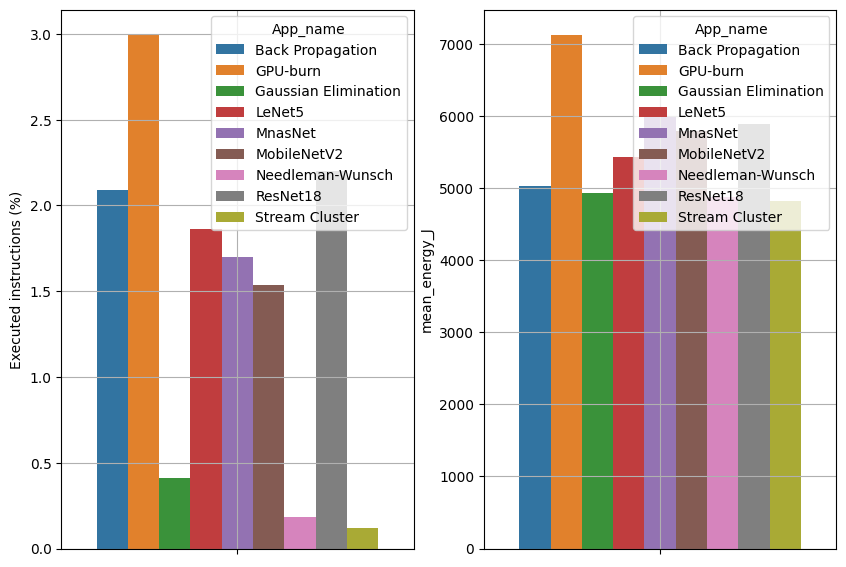

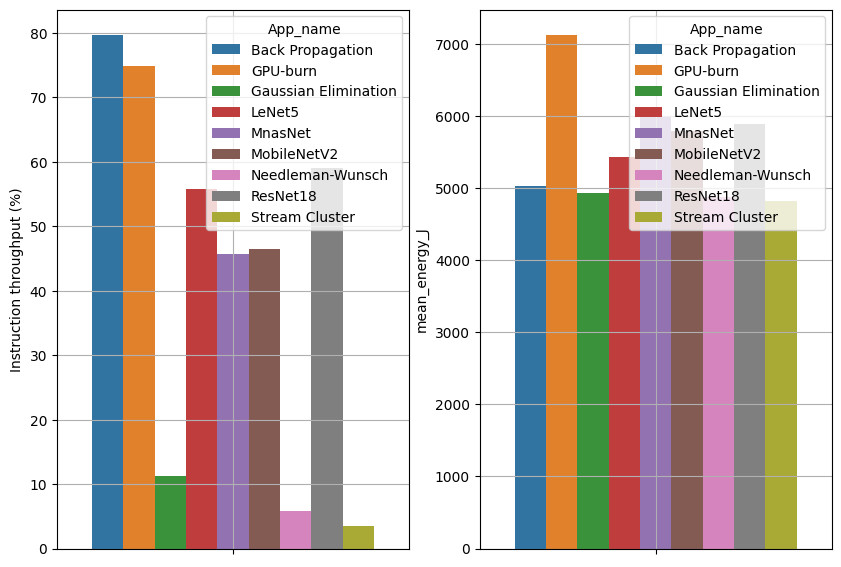

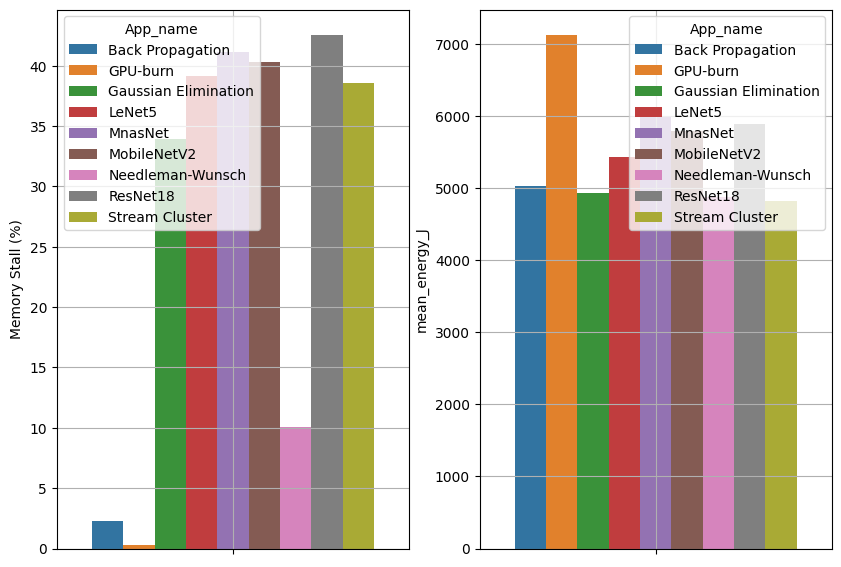

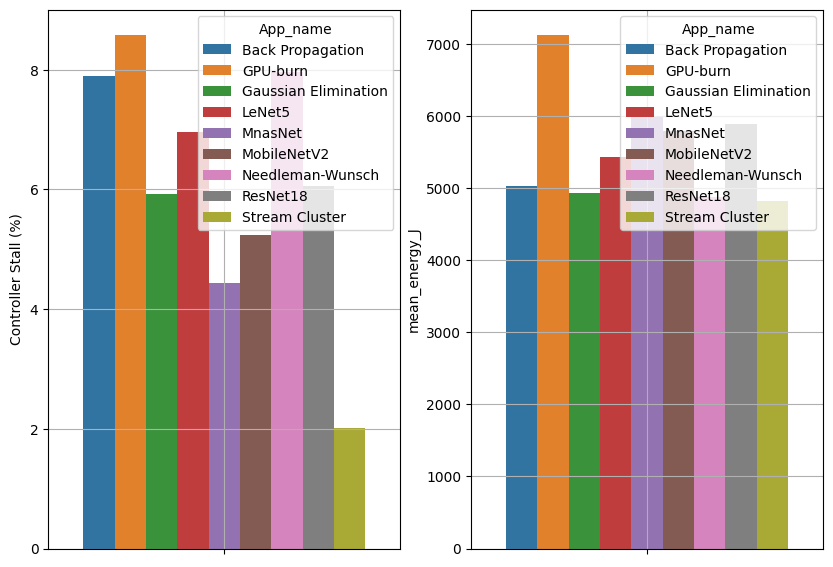

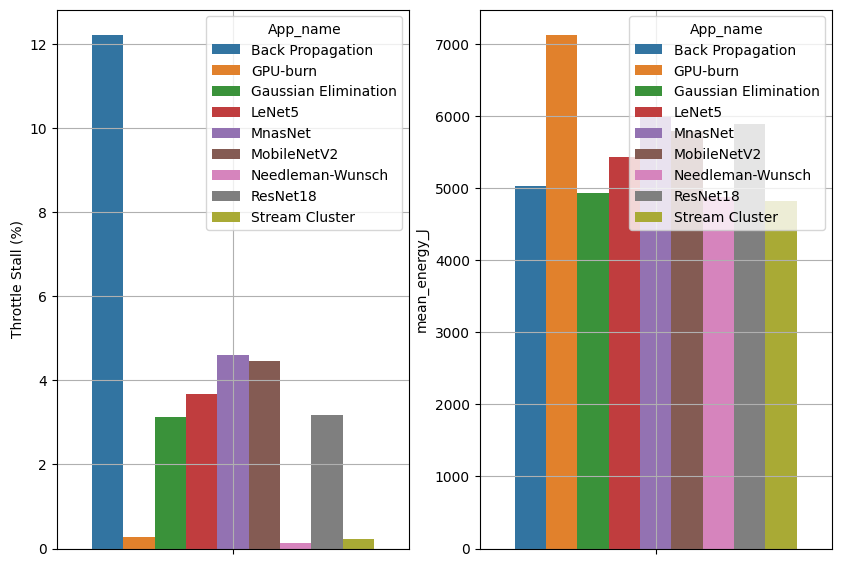

In [40]:
for column in [_ for _ in table.columns if ('Executed' in _ or 'Instruction' in _ or 'Stall' in _)]:
    fig, ax = plt.subplots(1,2,figsize=(10,7))
    sns.barplot(data=table, y=column, hue='App_name', ax = ax[0])
    sns.barplot(data=table, y='mean_energy_J', hue='App_name', ax = ax[1])
    ax[0].grid()
    ax[1].grid()

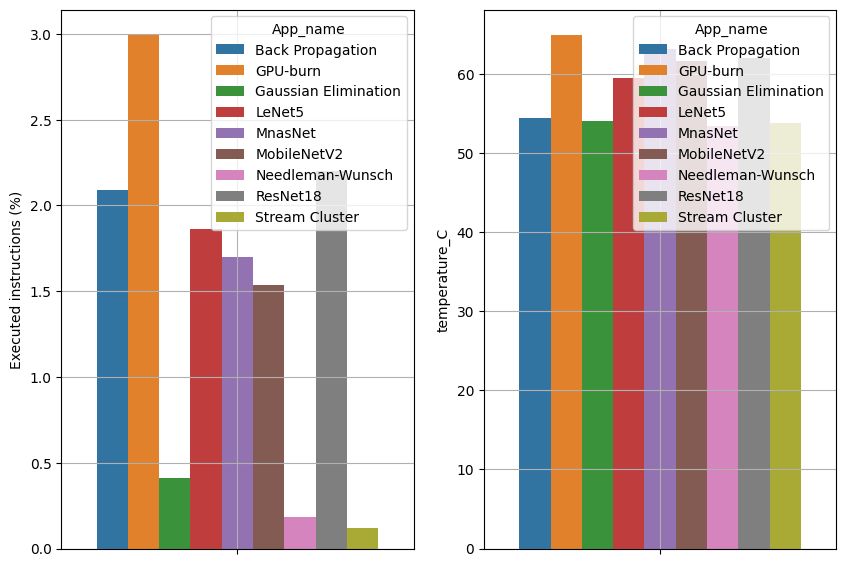

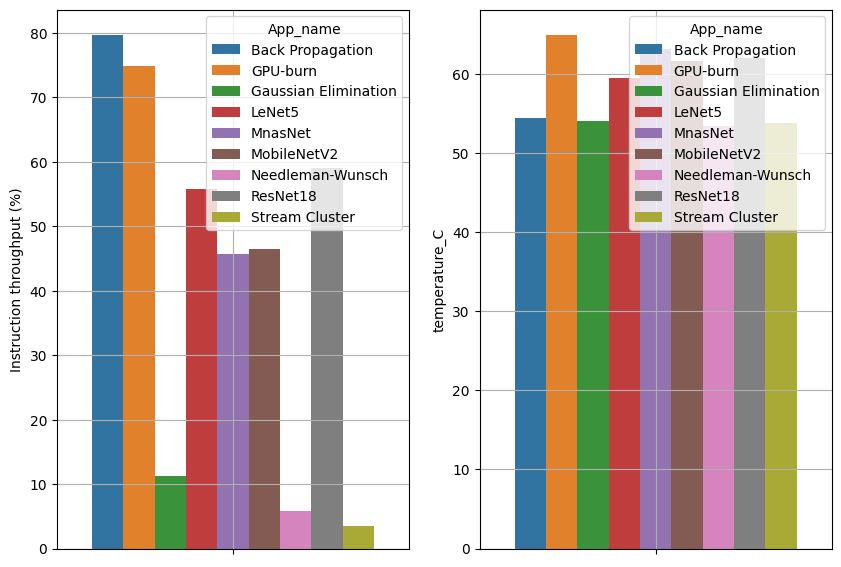

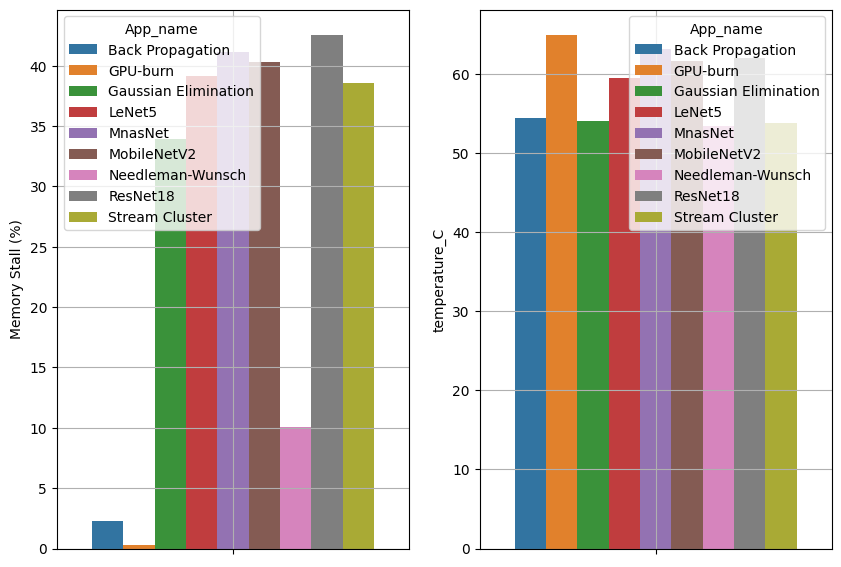

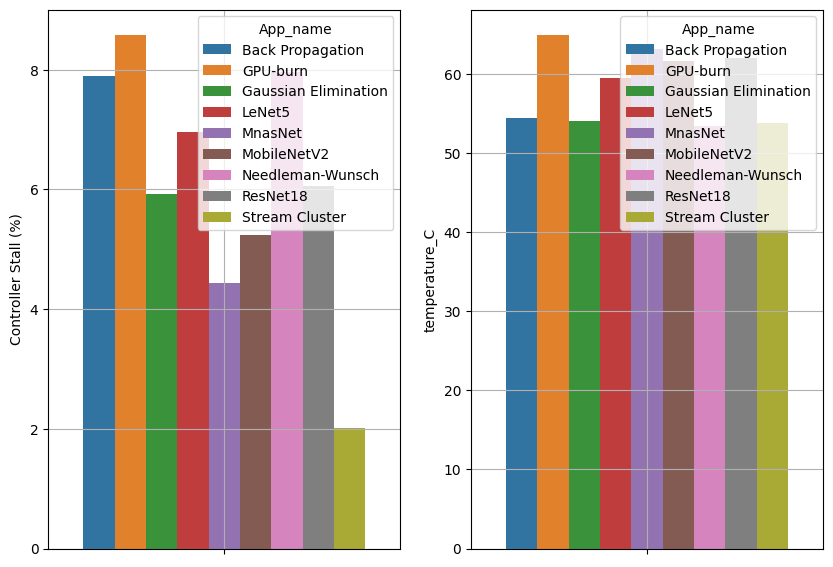

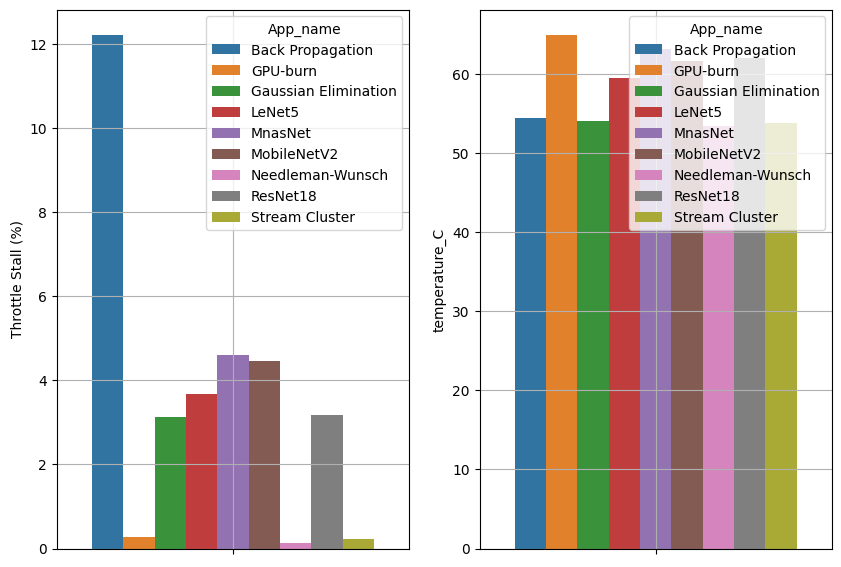

In [41]:
for column in [_ for _ in table.columns if ('Executed' in _ or 'Instruction' in _ or 'Stall' in _)]:
    fig, ax = plt.subplots(1,2,figsize=(10,7))
    sns.barplot(data=table, y=column, hue='App_name', ax = ax[0])
    sns.barplot(data=table, y='temperature_C', hue='App_name', ax = ax[1])
    ax[0].grid()
    ax[1].grid()

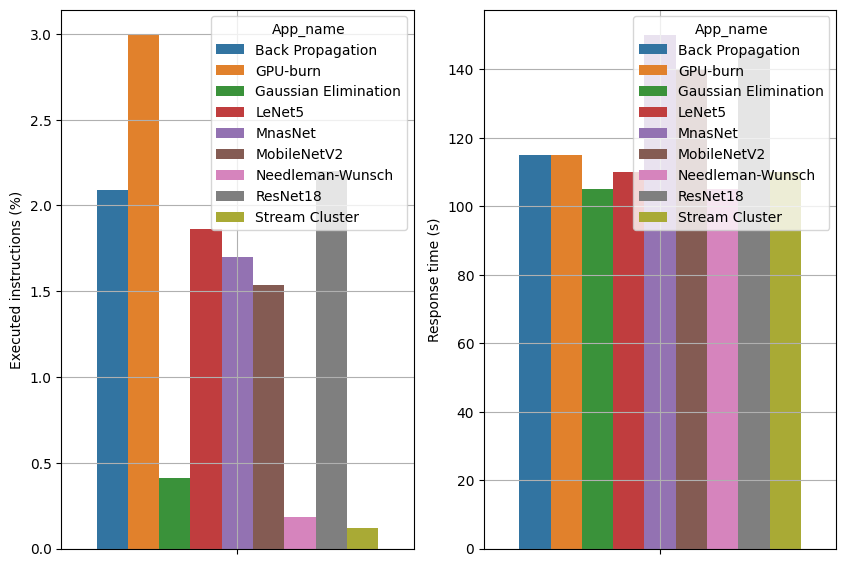

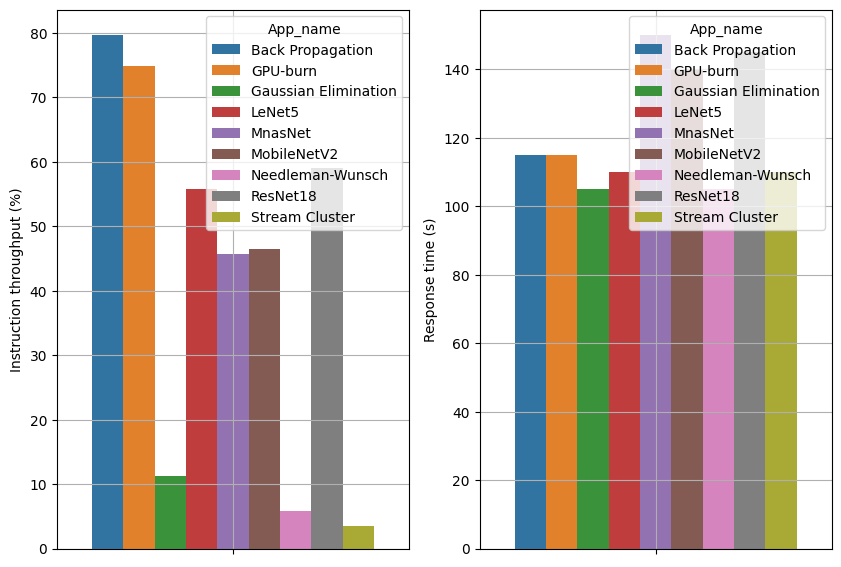

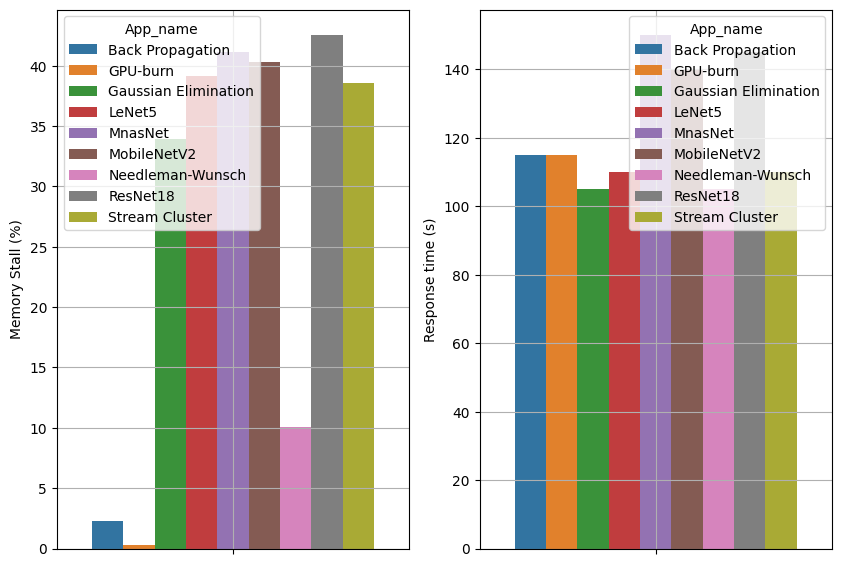

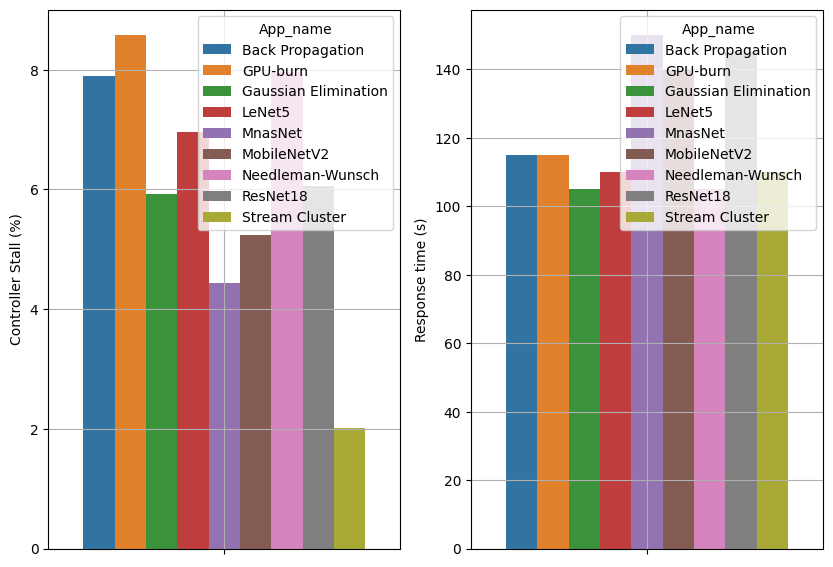

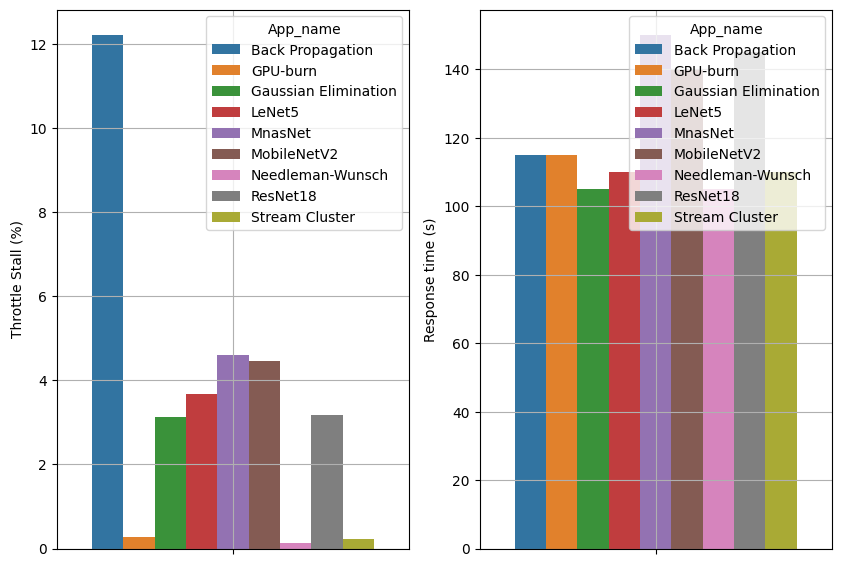

In [42]:
for column in [_ for _ in table.columns if ('Executed' in _ or 'Instruction' in _ or 'Stall' in _)]:
    fig, ax = plt.subplots(1,2,figsize=(10,7))
    sns.barplot(data=table, y=column, hue='App_name', ax = ax[0])
    sns.barplot(data=table, y='Response time (s)', hue='App_name', ax = ax[1])
    ax[0].grid()
    ax[1].grid()

In [225]:
table.to_csv('./results.csv')

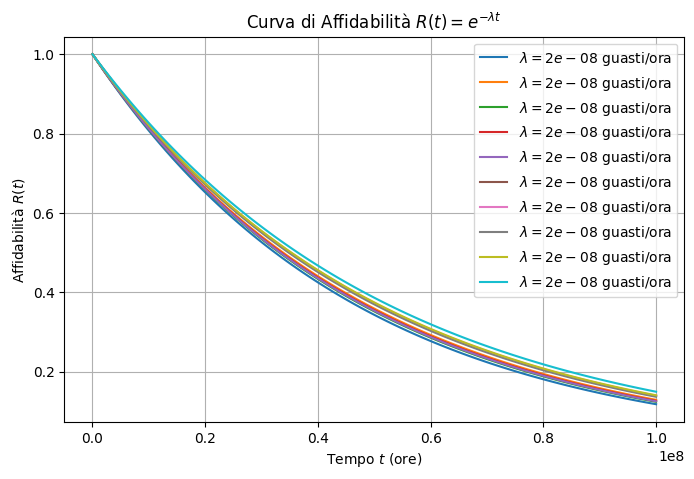

In [33]:
import numpy as np
import matplotlib.pyplot as plt

lambdas = [21.4e-9, 20.5e-9, 20.9e-9, 20.7e-9, 20.8e-9, 19.79e-9, 19.72e-9, 19.92e-9, 19.65e-9, 19.03e-9]
t_max = 100000000
n_points = 100

t = np.linspace(0, t_max, n_points)

plt.figure(figsize=(8, 5))

for lam in lambdas:
    R = np.exp(-lam * t)
    label = r'$\lambda = {:.0e}\ \mathrm{{guasti/ora}}$'.format(lam)
    plt.plot(t, R, label=label)

plt.title('Curva di Affidabilità $R(t) = e^{-\\lambda t}$')
plt.xlabel('Tempo $t$ (ore)')
plt.ylabel('Affidabilità $R(t)$')
# plt.yscale('log')
# plt.ylim(0.05, 1.005)
# plt.xlim(-0.05, 0.2e16)
plt.grid(True)
plt.legend()
plt.show()

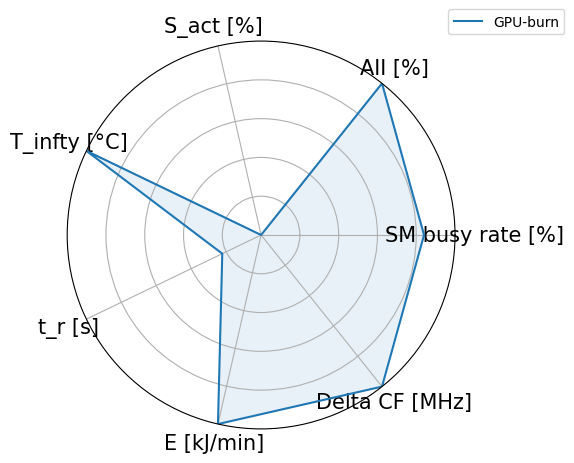

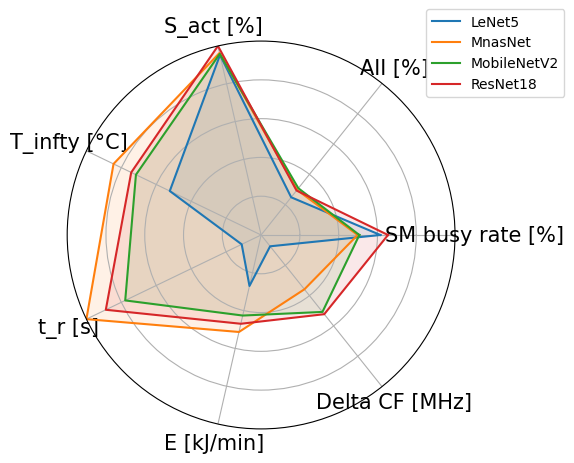

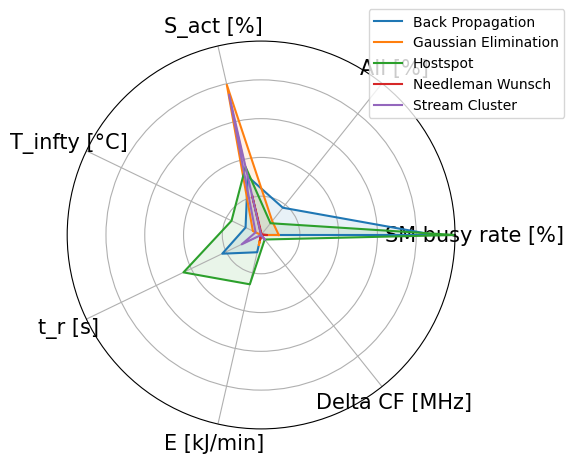

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from io import StringIO

# Dataset
data = StringIO("""
Application,Domain,SM busy rate [%],AII [%],S_act [%],T_infty [°C],t_r [s],E [kJ/min],Delta CF [MHz]
GPU-burn,Matrix Multiplication,74.82,74.81,9.162,64.97,115,7.12,740
LeNet5,CNN,55.69,21.21,49.71,59.5,110,5.44,120
MnasNet,CNN,45.74,24.69,50.17,63.19,150,6.00,310
MobileNetV2,CNN,46.49,25.46,49.96,61.72,140,5.80,410
ResNet18,CNN,59.04,24.38,51.74,62.03,145,5.90,420
Back Propagation,Machine learning,79.61,16.30,22.34,54.53,115,5.03,70
Gaussian Elimination,Linear algebra,11.21,10.03,42.99,54.05,105,4.94,70
Hostspot,Structured grid,88.38,9.00,24.5,55.45,125,5.42,90
Needleman Wunsch,Linear algebra,5.84,3.79,18.17,53.51,105,4.88,70
Stream Cluster,Machine learning,3.48,3.47,40.78,53.87,110,4.82,90
""")

df = pd.read_csv(data)

features = ['SM busy rate [%]', 'AII [%]', 'S_act [%]', 'T_infty [°C]', 't_r [s]', 'E [kJ/min]', 'Delta CF [MHz]']

# Normalizzazione Min-Max
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[features] = scaler.fit_transform(df[features])

# Gruppi
df_gpu = df_norm[df_norm['Application'] == 'GPU-burn']
df_nn = df_norm[df_norm['Domain'] == 'CNN']
df_other = df_norm[~df_norm.index.isin(df_gpu.index.union(df_nn.index))]

# Funzione radar plot
# Funzione aggiornata con etichette sull'asse radiale
def make_spider(df_subset, title, color):
    labels = features
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    for _, row in df_subset.iterrows():
        values = row[features].tolist()
        values += values[:1]
        ax.plot(angles, values, label=row['Application'])
        ax.fill(angles, values, alpha=0.1)

    # ax.set_title(title, size=15, color=color, y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=15)

    # Togli le etichette delle circonferenze
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels([])  # Nessuna etichetta
    ax.set_ylim(0, 1)

    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()



# Plot normalizzati
make_spider(df_gpu, 'GPU-burn (normalizzato)', 'red')
make_spider(df_nn, 'Reti Neurali (CNN) - normalizzato', 'blue')
make_spider(df_other, 'Altre Applicazioni - normalizzato', 'green')
